In [ ]:
!pip install opencv-python scikit-learn matplotlib


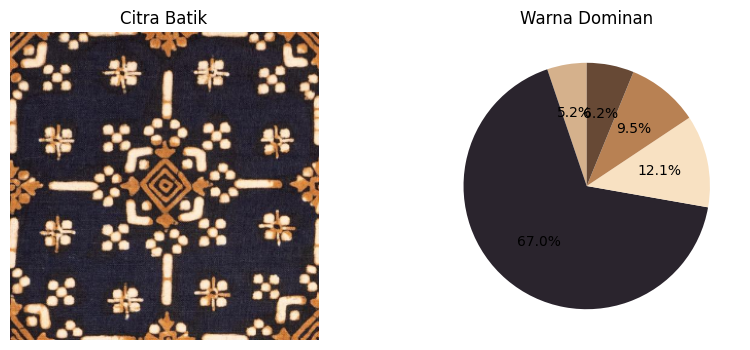

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load image
image = cv2.imread("sample_batik.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image
image = cv2.resize(image, (300, 300))

# Convert RGB to LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

# Prepare pixel data
pixels = image_lab.reshape((-1, 3))
pixels = np.float32(pixels)

# K-Means clustering
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(pixels)

# Get cluster centers
centers_lab = kmeans.cluster_centers_.astype(int)

# Convert LAB to RGB
centers_lab = centers_lab.reshape(1, K, 3).astype(np.uint8)
centers_rgb = cv2.cvtColor(centers_lab, cv2.COLOR_LAB2RGB)
centers_rgb = centers_rgb.reshape(K, 3)

# Calculate percentage
unique, counts = np.unique(labels, return_counts=True)
percentages = counts / counts.sum() * 100

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Citra Batik")

plt.subplot(1, 2, 2)
plt.pie(
    percentages,
    colors=centers_rgb / 255,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Warna Dominan")

plt.show()


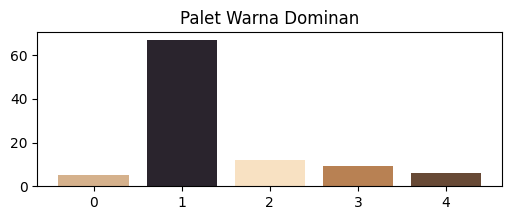

In [3]:
plt.figure(figsize=(6, 2))
for i in range(K):
    plt.bar(i, percentages[i], color=centers_rgb[i] / 255)

plt.title("Palet Warna Dominan")
plt.savefig("hasil_warna_dominan.png")
plt.show()
